# Compute the deflection of a 2D membrane is subject to a load p #

/opt/homebrew/Caskroom/miniforge/base/envs/fenics-legacy/lib/python3.10/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Solving linear variational problem.


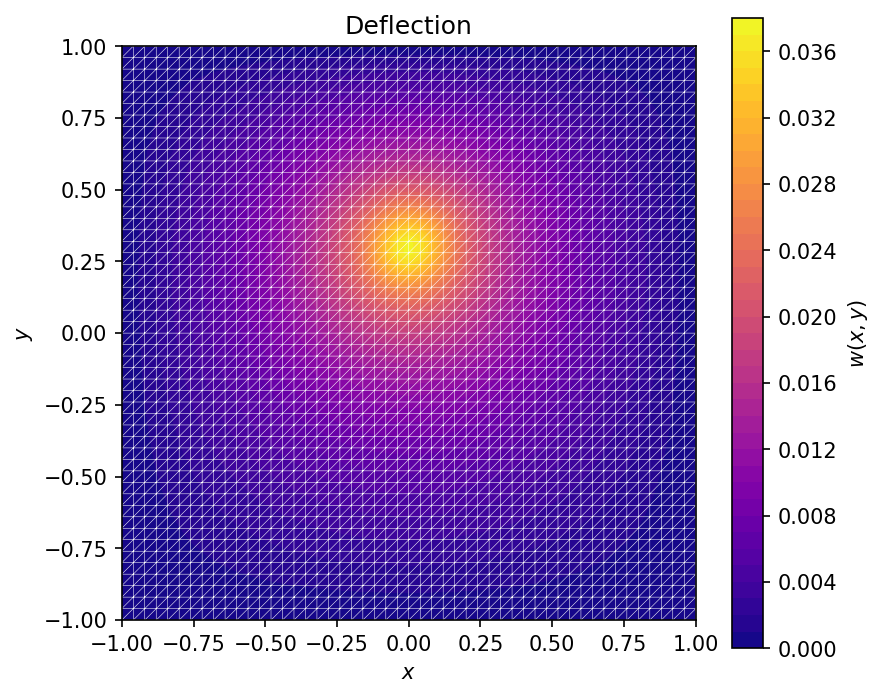

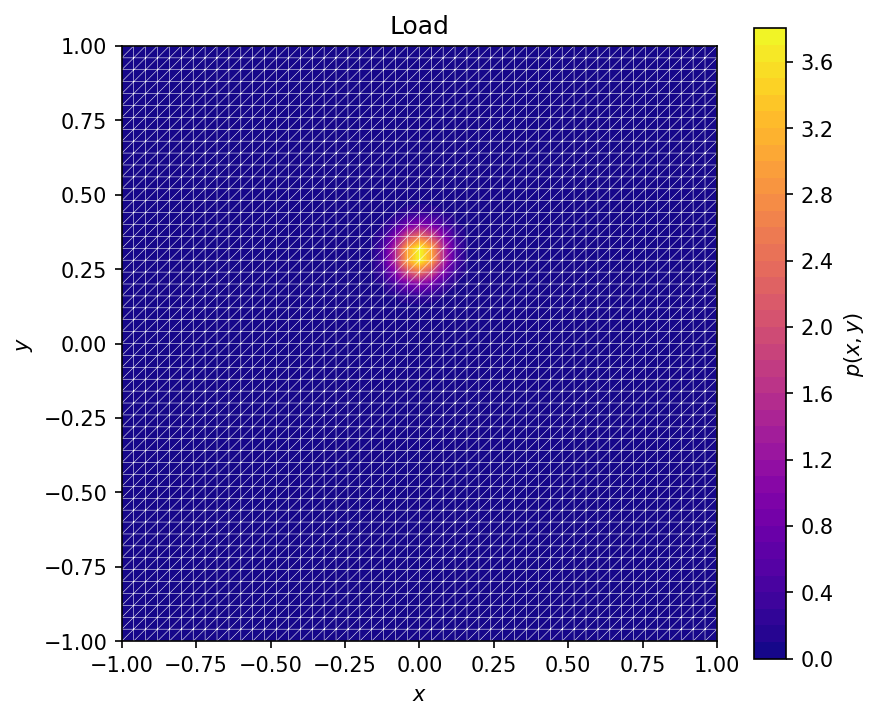

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fenics import*

# first, nondimensionalize the equation to get the appropraite variational formulation

# mesh

mesh = RectangleMesh(Point(-1, -1), Point(1, 1), 50, 50)
V = FunctionSpace(mesh, 'Lagrange', 1)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# load

beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))', degree=1, beta=beta, R0=R0)

# parameters

p.beta = 12
p.R0 = 0.3

# variational problem

w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx
w = Function(V)
solve(a == L, w, bc)

# plots

p = interpolate(p, V)

plt.figure(figsize=(6,5), dpi=150)

c = plot(w, cmap="plasma")      # scalar field
plot(mesh, color="white", linewidth=0.25)  # overlay mesh

plt.colorbar(c, label=r"$w(x,y)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Deflection")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5), dpi=150)

c = plot(p, cmap="plasma")
plot(mesh, color="white", linewidth=0.25)

plt.colorbar(c, label=r"$p(x,y)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Load")

plt.tight_layout()
plt.show()


